In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow
from tensorflow.keras import datasets
import cv2
from tensorflow.keras import applications


In [128]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [129]:
label = {0: 'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

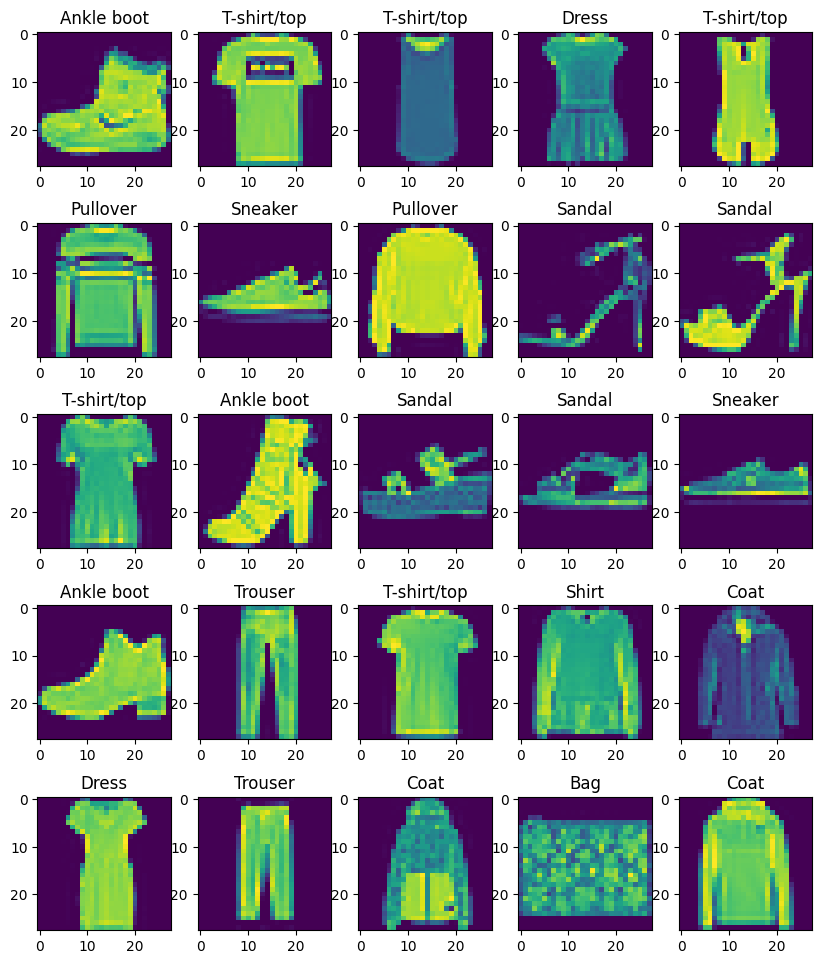

In [130]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(5, 5, figsize=(10, 12))
for i in range(25):
    ax[i // 5, i % 5].imshow(train_images[i])
    ax[i // 5, i % 5].set_title(label[train_labels[i]])

In [131]:
bat_size = 32
image_size = 28
image_channel = 1

In [132]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
train_labels_ohe = enc.fit_transform(train_labels.reshape(-1, 1)).toarray().astype(int)
test_labels_ohe = enc.transform(test_labels.reshape(-1, 1)).toarray().astype(int)

In [133]:
from sklearn.model_selection import train_test_split 
x_te, x_val, y_te, y_val = train_test_split(test_images, test_labels_ohe, test_size=0.3, random_state=21)

In [134]:
train_images = train_images.reshape((-1, 28, 28, 1))
x_val = x_val.reshape((-1, 28, 28, 1))
x_te  = x_te.reshape((-1, 28, 28, 1))

In [135]:
y_val[1].shape

(10,)

In [136]:
from keras import Model, layers


net = {}

net['input'] = layers.Input((28, 28))
net['flat'] = layers.Flatten()(net['input'])
net['dense_1'] = layers.Dense(256, activation = 'relu')(net['flat'])
net['dense_2'] = layers.Dense(128, activation = 'selu')(net['dense_1'])
net['dense_3'] = layers.Dense(64, activation = 'relu')(net['dense_2'])
net['output'] = layers.Dense(10,activation = 'softmax')(net['dense_3'])


model = Model(net['input'], net['output'])


In [137]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [138]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
train_labels[0].shape

()

In [143]:
n_epochs, n_save_after = 100, 80


for i in range(n_epochs):
    model.fit(train_images, train_labels_ohe, epochs=1, verbose=0, validation_data=(x_val, y_val))
    print(f'step : {i}' )
    if i >= n_save_after:
        print(f'step : {i}' )
        model.save('/kaggle/working/model_' + str(i) + '.h5')

step : 0
step : 1
step : 2
step : 3
step : 4
step : 5
step : 6
step : 7
step : 8
step : 9
step : 10
step : 11
step : 12
step : 13
step : 14
step : 15
step : 16
step : 17
step : 18
step : 19
step : 20
step : 21
step : 22
step : 23
step : 24
step : 25
step : 26
step : 27
step : 28
step : 29
step : 30
step : 31
step : 32
step : 33
step : 34
step : 35
step : 36
step : 37
step : 38
step : 39
step : 40
step : 41
step : 42
step : 43
step : 44
step : 45
step : 46
step : 47
step : 48
step : 49
step : 50
step : 51
step : 52
step : 53
step : 54
step : 55
step : 56
step : 57
step : 58
step : 59
step : 60
step : 61
step : 62
step : 63
step : 64
step : 65
step : 66
step : 67
step : 68
step : 69
step : 70
step : 71
step : 72
step : 73
step : 74
step : 75
step : 76
step : 77
step : 78
step : 79
step : 80
step : 81
step : 82
step : 83
step : 84
step : 85
step : 86
step : 87
step : 88
step : 89
step : 90
step : 91
step : 92
step : 93
step : 94
step : 95
step : 96
step : 97
step : 98
step : 99


In [144]:
from tensorflow.keras.models import load_model 

def load_all_models(n_start, n_end):
    all_models = list()
    
    for epoch in range(n_start, n_end):
        filename = '/kaggle/working/model_' + str(epoch) + '.h5'
        model = load_model(filename)
        all_models.append(model)
        print('>loaded %s' % filename)
        
    return all_models



members = load_all_models(n_save_after, n_epochs)

print('Loaded %d models' % len(members))


members = list(reversed(members))

In [161]:
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

def ensemble_predictions(members, test_images):
    
    
    yhats = [model.predict(test_images) for model in members]
    yhats = np.array(yhats)
    summed = np.sum(yhats, axis=0)
    result = np.argmax(summed, axis=1)
    
    return result

def evaluate_n_members(members, n_members, test_images, testy):
    
    
    subset = members[:n_members]
    yhat = ensemble_predictions(subset, test_images)
    return accuracy_score(testy, yhat)



In [163]:
single_scores, ensemble_scores = list(), list()


for i in range(1, len(members)+1):
    ensemble_score = evaluate_n_members(members, i, test_images, test_labels)
    testy_enc = to_categorical(test_labels)
    
    
    _, single_score = members[i-1].evaluate(test_images, testy_enc, verbose=0)
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    
    
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
> 1: single=0.885, ensemble=0.885
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
> 2: single=0.881, ensemble=0.889
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
> 3: single=0.876, ensemble=0.888
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
> 4: single=0.882, ensemble=0.891
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
> 5: single=0.885, ensemble=0.890
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━

In [166]:
print('Single score accuracy %.3f (%.3f)' % (np.mean(single_scores), np.std(single_scores)))
print('Ensemble model accuracy %.3f (%.3f)' % (np.mean(ensemble_scores), np.std(ensemble_scores)))

Single score accuracy 0.881 (0.005)
Ensemble model accuracy 0.890 (0.001)
